# Description
### This Jupyter Notebook is part of the Projektwork 2023-24 in order to be able to make a quantized statement
#### 32 Peaces in each type of seperator
#### Multiple Runs
#### Count the amount of individual objects




In [2]:
# Imports
import cv2
import os
import matplotlib.pyplot as plt
from imutils.video import VideoStream
from imutils.video import FPS
import argparse
import imutils
import time


In [3]:
# Define Pathes
folder ='C:\\Users\\AI-Student\\Desktop\\VideoFiles\\Vereinzelung'

### Define Parameter

In [4]:
# Numkber of Objets for eatch Video the same
n_objects = 32

# Generate an array of all Files in the Path
Files = []

# Generate an array of the Result of eatch Video
Result = []

# Generate an array for the timestamps
Time = []

desired_frame_time = 0
current_frame_number = 0

In [90]:
def DetectAmountObjekts(path):
    cap = cv2.VideoCapture(format(path))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    roi_x = 620
    roi_y = 200
    roi_width = 2
    roi_height = 740

    threshold = 150

    scan_area = [500, 220, 500, 700]

    object_detected = False
    total_objects = 0

    cv2.namedWindow('MainWindow', cv2.WINDOW_NORMAL)

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        current_frame_number = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        desired_frame_time = current_frame_number / fps
        print(f"Der Zeitstempel des Frames {current_frame_number} beträgt {desired_frame_time} Sekunden")

        # Extrahieren Sie den Scannbereich und ROI aus dem Frame
        scan_roi = frame[scan_area[1]:scan_area[1] + scan_area[3], scan_area[0]:scan_area[0] + scan_area[2]].copy()
        roi = frame[roi_y:roi_y + roi_height, roi_x:roi_x + roi_width].copy()

        cv2.putText(frame, f"Left: {roi_x}", (roi_x, roi_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)
        cv2.putText(frame, f"Right: {roi_x+roi_width}", (roi_x+roi_width, roi_y+roi_height), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)

        # Konvertieren Sie das ROI in Graustufen
        roi_gray = cv2.cvtColor(scan_roi, cv2.COLOR_BGR2GRAY)

        # Binarisieren Sie das ROI
        _, binary_roi = cv2.threshold(roi_gray, threshold, 255, cv2.THRESH_BINARY)
        cv2.imshow('binary_roi', binary_roi)

        # Finden Sie Konturen im binarisierten ROI
        contours, _ = cv2.findContours(binary_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        nr =  0
        for cnt in contours:
            nr =nr+1
            M = cv2.moments(cnt)
            if M["m00"] != 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])

                # Berücksichtigen Sie den Versatz des ROI im Hauptbild
                cx += scan_area[0]
                cy += scan_area[1]

                cnt[:, 0, 0] += scan_area[0]
                cnt[:, 0, 1] += scan_area[1]

                cv2.putText(frame, f"cx: {cx}", (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)
                #cv2.putText(frame, f"cy: {cy}", (cx, cy+20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)

                cv2.circle(frame, (cx,cy), radius=10, color=(0, 0, 255), thickness=-1)

                # Überprüfen Sie, ob der Mittelpunkt innerhalb des Scannbereichs liegt
                #if roi_x <= cx <= roi_x + roi_width and roi_y <= cy <= roi_x + roi_height:
                if roi_x <= cx <= roi_x + roi_width:
                    if not object_detected:
                        total_objects += 1
                        #object_detected = True
                        print(f"Objekt {total_objects} im Scannbereich erkannt und gezählt!")

        if cv2.countNonZero(binary_roi) == 0:
            object_detected = False



        # Zeichnen Sie das Rechteck um den Scannbereich
        cv2.rectangle(frame, (scan_area[0], scan_area[1]), (scan_area[0] + scan_area[2], scan_area[1] + scan_area[3]), (0, 255, 0), 2)

        # Zeichnen Sie das Rechteck um den ROI
        cv2.rectangle(frame, (roi_x, roi_y), (roi_x + roi_width, roi_y + roi_height), (0, 0, 255), 2)

        # Zeigen Sie die Gesamtzahl der erkannten Objekte an
        cv2.putText(frame, f"Gesamtobjekte: {total_objects}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

        # Zeichnen Sie die Konturen der erkannten Objekte
        cv2.drawContours(frame, contours, -1, (0, 0, 255), 2)

        # Zeigen Sie das Hauptfenster
        cv2.imshow('MainWindow', frame)

        # Zeigen Sie den ROI
        cv2.imshow('ROI', roi)

        # Zeigen Sie das binarisierte Bild des Scannbereichs
        cv2.imshow('Scannbereich', scan_roi)

        key = cv2.waitKey(15) & 0xff
        # ESC to close
        if key == 27:
            break
        # Space for pause
        elif key == 32:
            cv2.waitKey() & 0xff
    
    Time.append(desired_frame_time)
    cap.release()
    cv2.destroyAllWindows()

    return total_objects

In [91]:
for file in os.listdir(folder):
    path = folder + '\\' + format(file)
    total_objects = DetectAmountObjekts(path)
    Files.append(path)
    Result.append(total_objects)

Der Zeitstempel des Frames 1 beträgt 0.09103322712790168 Sekunden
Der Zeitstempel des Frames 2 beträgt 0.18206645425580337 Sekunden
Der Zeitstempel des Frames 3 beträgt 0.27309968138370505 Sekunden
Der Zeitstempel des Frames 4 beträgt 0.36413290851160673 Sekunden
Der Zeitstempel des Frames 5 beträgt 0.4551661356395084 Sekunden
Der Zeitstempel des Frames 6 beträgt 0.5461993627674101 Sekunden
Der Zeitstempel des Frames 7 beträgt 0.6372325898953118 Sekunden
Der Zeitstempel des Frames 8 beträgt 0.7282658170232135 Sekunden
Der Zeitstempel des Frames 9 beträgt 0.8192990441511152 Sekunden
Der Zeitstempel des Frames 10 beträgt 0.9103322712790168 Sekunden
Der Zeitstempel des Frames 11 beträgt 1.0013654984069187 Sekunden
Der Zeitstempel des Frames 12 beträgt 1.0923987255348202 Sekunden
Der Zeitstempel des Frames 13 beträgt 1.183431952662722 Sekunden
Der Zeitstempel des Frames 14 beträgt 1.2744651797906237 Sekunden
Der Zeitstempel des Frames 15 beträgt 1.3654984069185254 Sekunden
Der Zeitstempel 

Der Zeitstempel des Frames 131 beträgt 11.92535275375512 Sekunden
Der Zeitstempel des Frames 132 beträgt 12.016385980883022 Sekunden
Der Zeitstempel des Frames 133 beträgt 12.107419208010924 Sekunden
Der Zeitstempel des Frames 134 beträgt 12.198452435138826 Sekunden
Der Zeitstempel des Frames 135 beträgt 12.289485662266728 Sekunden
Der Zeitstempel des Frames 136 beträgt 12.38051888939463 Sekunden
Der Zeitstempel des Frames 137 beträgt 12.471552116522531 Sekunden
Der Zeitstempel des Frames 138 beträgt 12.562585343650433 Sekunden
Der Zeitstempel des Frames 139 beträgt 12.653618570778335 Sekunden
Der Zeitstempel des Frames 140 beträgt 12.744651797906236 Sekunden
Der Zeitstempel des Frames 141 beträgt 12.835685025034138 Sekunden
Der Zeitstempel des Frames 142 beträgt 12.92671825216204 Sekunden
Der Zeitstempel des Frames 143 beträgt 13.017751479289942 Sekunden
Der Zeitstempel des Frames 144 beträgt 13.108784706417843 Sekunden
Der Zeitstempel des Frames 145 beträgt 13.199817933545745 Sekunde

Der Zeitstempel des Frames 258 beträgt 23.486572598998634 Sekunden
Der Zeitstempel des Frames 259 beträgt 23.577605826126536 Sekunden
Der Zeitstempel des Frames 260 beträgt 23.668639053254438 Sekunden
Der Zeitstempel des Frames 261 beträgt 23.75967228038234 Sekunden
Der Zeitstempel des Frames 262 beträgt 23.85070550751024 Sekunden
Der Zeitstempel des Frames 263 beträgt 23.941738734638143 Sekunden
Der Zeitstempel des Frames 264 beträgt 24.032771961766045 Sekunden
Der Zeitstempel des Frames 265 beträgt 24.123805188893947 Sekunden
Der Zeitstempel des Frames 266 beträgt 24.21483841602185 Sekunden
Der Zeitstempel des Frames 267 beträgt 24.30587164314975 Sekunden
Der Zeitstempel des Frames 268 beträgt 24.396904870277652 Sekunden
Der Zeitstempel des Frames 269 beträgt 24.487938097405554 Sekunden
Der Zeitstempel des Frames 270 beträgt 24.578971324533455 Sekunden
Der Zeitstempel des Frames 271 beträgt 24.670004551661357 Sekunden
Der Zeitstempel des Frames 272 beträgt 24.76103777878926 Sekunden


Der Zeitstempel des Frames 380 beträgt 34.59262630860264 Sekunden
Der Zeitstempel des Frames 381 beträgt 34.68365953573054 Sekunden
Der Zeitstempel des Frames 382 beträgt 34.77469276285844 Sekunden
Der Zeitstempel des Frames 383 beträgt 34.865725989986345 Sekunden
Der Zeitstempel des Frames 384 beträgt 34.95675921711425 Sekunden
Der Zeitstempel des Frames 385 beträgt 35.04779244424215 Sekunden
Der Zeitstempel des Frames 386 beträgt 35.13882567137005 Sekunden
Der Zeitstempel des Frames 387 beträgt 35.22985889849795 Sekunden
Der Zeitstempel des Frames 388 beträgt 35.32089212562585 Sekunden
Der Zeitstempel des Frames 389 beträgt 35.411925352753755 Sekunden
Der Zeitstempel des Frames 390 beträgt 35.50295857988166 Sekunden
Der Zeitstempel des Frames 391 beträgt 35.59399180700956 Sekunden
Der Zeitstempel des Frames 392 beträgt 35.68502503413746 Sekunden
Der Zeitstempel des Frames 393 beträgt 35.77605826126536 Sekunden
Der Zeitstempel des Frames 394 beträgt 35.867091488393264 Sekunden
Der Zei

Der Zeitstempel des Frames 499 beträgt 45.42558033682294 Sekunden
Der Zeitstempel des Frames 500 beträgt 45.51661356395084 Sekunden
Der Zeitstempel des Frames 501 beträgt 45.60764679107874 Sekunden
Objekt 9 im Scannbereich erkannt und gezählt!
Der Zeitstempel des Frames 502 beträgt 45.698680018206645 Sekunden
Der Zeitstempel des Frames 503 beträgt 45.789713245334546 Sekunden
Der Zeitstempel des Frames 504 beträgt 45.88074647246245 Sekunden
Der Zeitstempel des Frames 505 beträgt 45.97177969959035 Sekunden
Der Zeitstempel des Frames 506 beträgt 46.06281292671825 Sekunden
Der Zeitstempel des Frames 507 beträgt 46.15384615384615 Sekunden
Der Zeitstempel des Frames 508 beträgt 46.244879380974055 Sekunden
Der Zeitstempel des Frames 509 beträgt 46.33591260810196 Sekunden
Der Zeitstempel des Frames 510 beträgt 46.42694583522986 Sekunden
Der Zeitstempel des Frames 511 beträgt 46.51797906235776 Sekunden
Der Zeitstempel des Frames 512 beträgt 46.60901228948566 Sekunden
Der Zeitstempel des Frames 

Der Zeitstempel des Frames 618 beträgt 56.258534365043246 Sekunden
Der Zeitstempel des Frames 619 beträgt 56.34956759217115 Sekunden
Der Zeitstempel des Frames 620 beträgt 56.44060081929905 Sekunden
Der Zeitstempel des Frames 621 beträgt 56.53163404642695 Sekunden
Der Zeitstempel des Frames 622 beträgt 56.62266727355485 Sekunden
Der Zeitstempel des Frames 623 beträgt 56.713700500682755 Sekunden
Der Zeitstempel des Frames 624 beträgt 56.80473372781066 Sekunden
Der Zeitstempel des Frames 625 beträgt 56.89576695493856 Sekunden
Der Zeitstempel des Frames 626 beträgt 56.98680018206646 Sekunden
Der Zeitstempel des Frames 627 beträgt 57.07783340919436 Sekunden
Der Zeitstempel des Frames 628 beträgt 57.168866636322264 Sekunden
Der Zeitstempel des Frames 629 beträgt 57.259899863450165 Sekunden
Der Zeitstempel des Frames 630 beträgt 57.35093309057807 Sekunden
Der Zeitstempel des Frames 631 beträgt 57.44196631770597 Sekunden
Der Zeitstempel des Frames 632 beträgt 57.53299954483387 Sekunden
Der Ze

Der Zeitstempel des Frames 746 beträgt 67.91078743741465 Sekunden
Der Zeitstempel des Frames 747 beträgt 68.00182066454256 Sekunden
Der Zeitstempel des Frames 748 beträgt 68.09285389167046 Sekunden
Der Zeitstempel des Frames 749 beträgt 68.18388711879837 Sekunden
Der Zeitstempel des Frames 750 beträgt 68.27492034592626 Sekunden
Der Zeitstempel des Frames 751 beträgt 68.36595357305417 Sekunden
Der Zeitstempel des Frames 752 beträgt 68.45698680018207 Sekunden
Der Zeitstempel des Frames 753 beträgt 68.54802002730997 Sekunden
Der Zeitstempel des Frames 754 beträgt 68.63905325443787 Sekunden
Der Zeitstempel des Frames 755 beträgt 68.73008648156578 Sekunden
Der Zeitstempel des Frames 756 beträgt 68.82111970869367 Sekunden
Der Zeitstempel des Frames 757 beträgt 68.91215293582158 Sekunden
Der Zeitstempel des Frames 758 beträgt 69.00318616294948 Sekunden
Der Zeitstempel des Frames 759 beträgt 69.09421939007738 Sekunden
Der Zeitstempel des Frames 760 beträgt 69.18525261720528 Sekunden
Der Zeitst

In [60]:
print(Result)

[24, 32, 141]


In [5]:
Result = [24, 23, 32]
Time = [52, 60, 40]

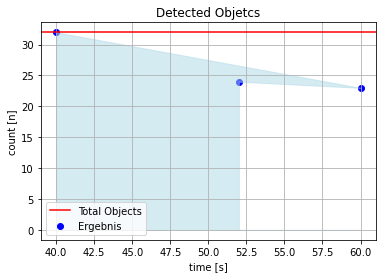

In [9]:
# Erstellen Sie ein Streudiagramm (scatter plot) mit Zeit auf der x-Achse und Ergebnissen auf der y-Achse
plt.scatter(Time, Result, label='Ergebnis', color='b', marker='o')

# Färben Sie den Bereich unterhalb der Datenlinie ein
plt.fill_between(Time, Result, color='lightblue', alpha=0.5)
plt.axhline(y = n_objects, color ='r', label = 'Total Objects')

# Beschriftungen und Titel hinzufügen
plt.xlabel('time [s]')
plt.ylabel('count [n]')
plt.title('Detected Objetcs')

# Gitterlinien hinzufügen
plt.grid(True)

# Legende hinzufügen
plt.legend()

# Diagramm anzeigen
plt.show()

In [98]:
Time = [time1, time2, time3]
Result = [24, 23, 32]